### Overview of preprocessing steps taken during the preparation of the data:
- load the file
- drop NULL values
- extract the target - genres column
- trim to min and max length of the overview column
- remove rows with little corresponding genres
- use spacy to remove unnecessary characters
### Preprocess datafile, where the genres are in columns

Import libraries and take a small sample of the data

In [2]:
import pandas as pd
data = pd.read_csv('data/movies_metadata.csv', index_col='id', low_memory=False)
data = data.sample(200)

### Create a new column from the first genre of the genres column

In [3]:
data = data.dropna(subset = ['overview'])
import numpy as np
genre_1 = []
for var in data.genres:
  if var != '[]':
    df = pd.DataFrame(eval(var))
    genre_1.append(df.iloc[0]['name'])
  else:
    genre_1.append(np.nan)

data['labels'] = genre_1

### Filter to get rows only less than 100 characters

In [4]:
mask = data['overview'].str.len() > 100
data = data.loc[mask]

### Filter for only rows with no more than 400 characters

In [5]:
data = data.dropna(subset = ['overview'])
data['overview'] = data['overview'].str.slice(0,400)
len(data)

182

### Get the count of the different labels

In [6]:
print(len(data['labels'].value_counts()))

19


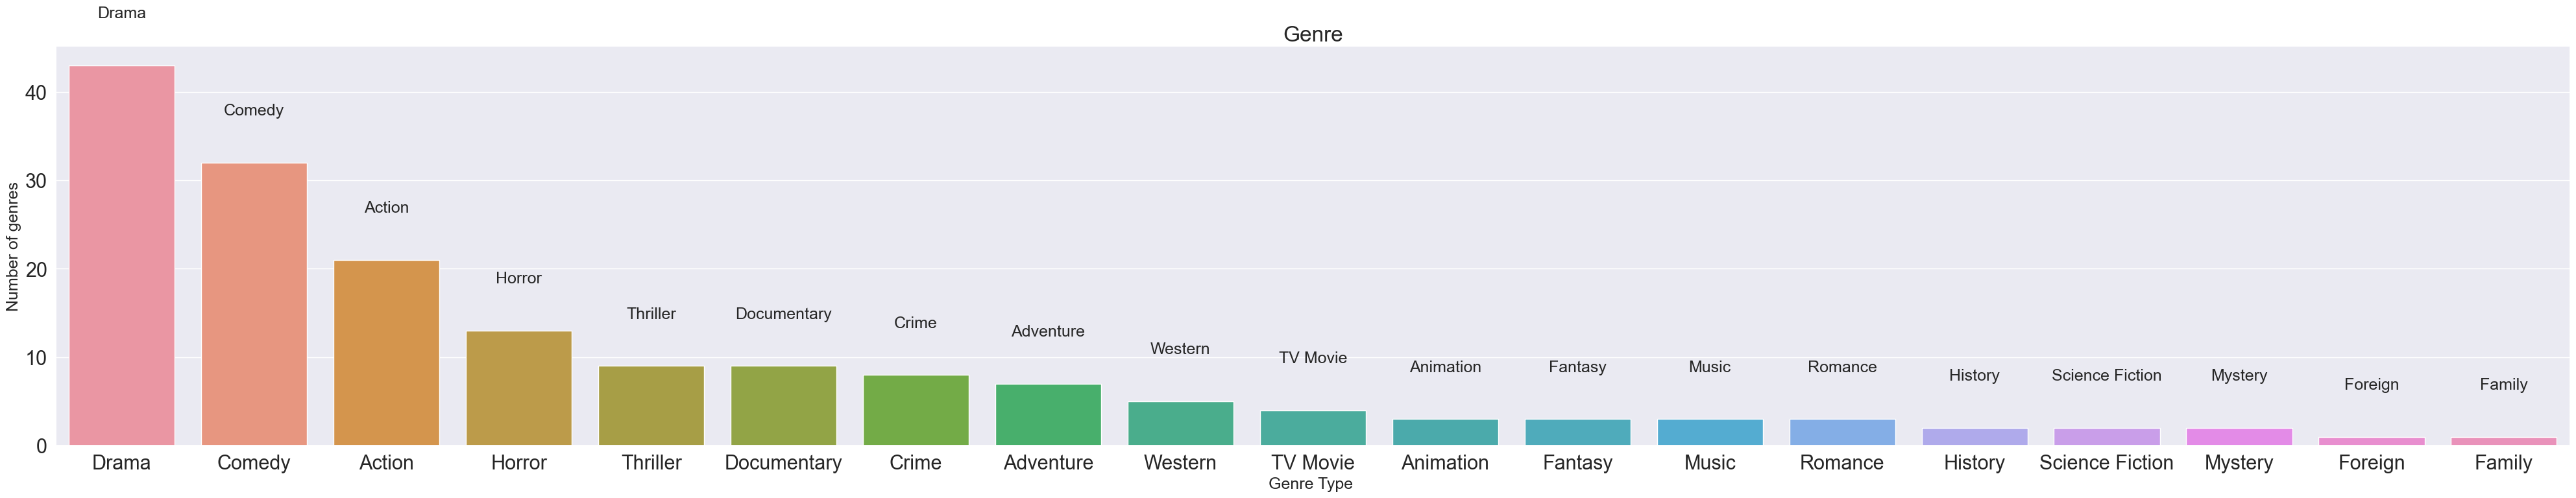

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

categories = data['labels']
sns.set(font_scale = 2)
plt.figure(figsize=(50,8))
ax= sns.barplot(x = categories.value_counts().index, y = categories.value_counts())
plt.title("Genre", fontsize=24)
plt.ylabel('Number of genres', fontsize=18)
plt.xlabel('Genre Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = categories.value_counts().index
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

### See which labels have very little values and remove them from the dataset

In [8]:
small = ['Carousel Productions', 'Aniplex', 'Odyssey Media','Foreign','War', 'History','TV Movie', 'Science Fiction','Family', 'Western','Music','Mystery','Fantasy' ]
data = data[~data.labels.isin(small)]

In [9]:
from sklearn.calibration import LabelEncoder
lb = LabelEncoder()
data['labels'] = lb.fit_transform(data.labels)

In [10]:
data = data[['overview', 'labels']]
data = data.dropna(subset = ['labels'])
len(data)

159

### use spacy to remove stop words and punctuation

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")
data["overview"] = data["overview"].apply(lambda text: " ".join(token.lemma_ for token in nlp(text)
                if not token.is_stop and not token.is_punct and not token.is_bracket and not token.is_quote
              and not token.is_currency and not token.is_oov
              and not token.is_digit and not token.pos_ == "PROPN"))

## Prepare data file where the genres are not in rows but in different colums

In [12]:
movies_metadata = pd.read_csv('data/movies_metadata.csv', low_memory=False, index_col=False)
movies_metadata = movies_metadata[['overview', 'genres']]
movies_metadata.dropna(subset=['overview', 'genres'], inplace=True)
movies_metadata.reset_index(drop=True, inplace=True)

extract the different genres from the genres column in the dataset, we limit ourselves to 4 genres of each title and overview 

In [ ]:
import numpy as np
genre_1 = []
genre_2 = []
genre_3 = []
genre_4 = []
for var in movies_metadata.genres:
  if var != '[]':
    df = pd.DataFrame(eval(var))
    for i in range(len(df)):
        if i == 0:
          genre_1.append(df.iloc[i]['name'])
        if i == 1:
          genre_2.append(df.iloc[i]['name'])
        if i == 2:
          genre_3.append(df.iloc[i]['name'])
        if i == 3:
          genre_4.append(df.iloc[i]['name'])
    if len(df)==1:
        genre_2.append(np.nan)
        genre_3.append(np.nan)
        genre_4.append(np.nan)
    if len(df)==2:
        genre_3.append(np.nan)
        genre_4.append(np.nan)
    if len(df)==3:
        genre_4.append(np.nan)
  else:
   genre_1.append(np.nan)
   genre_2.append(np.nan)
   genre_3.append(np.nan)
   genre_4.append(np.nan)

# create new colums with the arrays
movies_metadata['first_genre'] = genre_1
movies_metadata['second_genre'] = genre_2
movies_metadata['third_genre'] = genre_3
movies_metadata['forth_genre'] = genre_4

reduce the dataframe only to the columns in which we are interested

In [ ]:
movies_metadata.dropna(subset=['overview', 'first_genre'], inplace=True)
movies_metadata.reset_index(drop=True, inplace=True)
movies_metadata = movies_metadata[['overview', 'first_genre', 'second_genre', 'third_genre', 'forth_genre']]

overview of all the genres in our dataset in the form of a list, it is sorted for a clearer view 

In [ ]:
genres_n = ['Action', 'Adventure', 'Animation', 'Aniplex', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Odyssey Media', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
genres_n = sorted(set(genres_n))

create new genres columns, set 0's in all of the newly created columns

In [ ]:
for var in genres_n:
    movies_metadata[var] = 0

How to replace the 0 with 1 if there is such a genre in the first_genre column ?</br> In the same way the other columns ('second_genre', 'third_genre', 'forth_genre') are being transformed

In [ ]:
for x, y in movies_metadata['first_genre'].copy().items():
    if movies_metadata.iloc[x]['first_genre'] == 'Action':
        movies_metadata.at[x,'Action']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Adventure':
        movies_metadata.at[x,'Adventure']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Animation':
        movies_metadata.at[x,'Animation']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Aniplex':
        movies_metadata.at[x,'Aniplex']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Carousel Productions':
        movies_metadata.at[x,'Carousel Productions']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Comedy':
        movies_metadata.at[x,'Comedy']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Crime':
        movies_metadata.at[x,'Crime']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Documentary':
        movies_metadata.at[x,'Documentary']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Drama':
        movies_metadata.at[x,'Drama']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Family':
        movies_metadata.at[x,'Family']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Fantasy':
        movies_metadata.at[x,'Fantasy']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Foreign':
        movies_metadata.at[x,'Foreign']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'History':
        movies_metadata.at[x,'History']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Horror':
        movies_metadata.at[x,'Horror']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Music':
        movies_metadata.at[x,'Music']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Mystery':
        movies_metadata.at[x,'Mystery']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Odyssey Media':
        movies_metadata.at[x,'Odyssey Media']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Romance':
        movies_metadata.at[x,'Romance']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Science Fiction':
        movies_metadata.at[x,'Science Fiction']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'TV Movie':
        movies_metadata.at[x,'TV Movie']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Thriller':
        movies_metadata.at[x,'Thriller']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'War':
        movies_metadata.at[x,'War']= 1
    if movies_metadata.iloc[x]['first_genre'] == 'Western':
        movies_metadata.at[x,'Western']= 1

replace the null - np.NaN values in all of the newly created genres columns

In [ ]:
for var in genres_n:
    movies_metadata[var] =  movies_metadata[var].replace(np.nan, 0).astype(int)

delete the created columns for the different genres</br>
save to .csv file for later use

In [ ]:
#del movies_metadata['first_genre']
#del movies_metadata['second_genre']
#del movies_metadata['third_genre']
#del movies_metadata['forth_genre']
#movies_metadata.dropna(subset=['overview', 'first_genre'], inplace=True)
movies_metadata.reset_index(drop=True, inplace=True)
movies_metadata.to_csv('data/movies.csv', index=False)

# Conclusion
One needs to clean and prepare the data for being processed through the model.
Later the data is easier being analyzed by the model.